In [2]:
import os, sys
from math import sqrt, isnan
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal
import scipy.fftpack
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
from tqdm import tnrange

In [3]:
data_path = '/home/mabon/Cross_EM/datasets/TIME/stm_em/T1/RandomDelay/S1_K1_150k_L11_delay_20.npz'
whole_pack = np.load(data_path)
try:
    trace_array, textin_array, key = whole_pack['power_trace'], whole_pack['plain_text'], whole_pack['key']
except Exception:
    trace_array, textin_array, key = whole_pack['trace_mat'], whole_pack['textin_mat'], whole_pack['key']
N_len=150000
sr = 29538459

#sr = 71299495
#sr = 90000000


N = 1000

In [4]:
t=[]
for i in range(N_len):
    t.append(trace_array[i][1200:2200])
trace_array=t

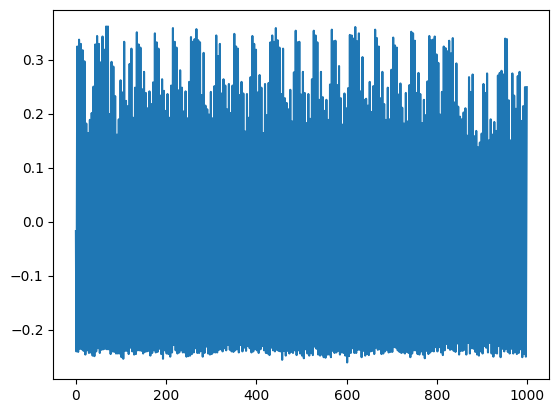

In [5]:
plt.plot(trace_array[1])

In [6]:
# Perform FFT on trace_array[1]

# sampling interval
ts = 1.0/sr
# calculate the frequency

n = np.arange(N)
T = N/sr
freq = n/T 
frequency_domain_data=[]
n_oneside = N // 2

# Perform FFT on trace_array[1]
frequency_domain_data=[]
for i in tnrange(N_len):
    X=scipy.fftpack.fft(trace_array[i])
    X_oneside =abs(X[:n_oneside]/n_oneside)
    frequency_domain_data.append(X_oneside)


/home/mabon/anaconda3/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:15: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  from ipykernel import kernelapp as app


  0%|          | 0/150000 [00:00<?, ?it/s]

In [7]:
#mkdir /home/mabon/Cross_EM/datasets/FREQ/xmega_em/T1/RandomDelay

In [8]:
np.savez('/home/mabon/Cross_EM/datasets/FREQ/stm_em/T1/RandomDelay/S1_K1_150k_L11_delay_20.npz',power_trace=frequency_domain_data,plain_text=textin_array[0:N_len],key=key)


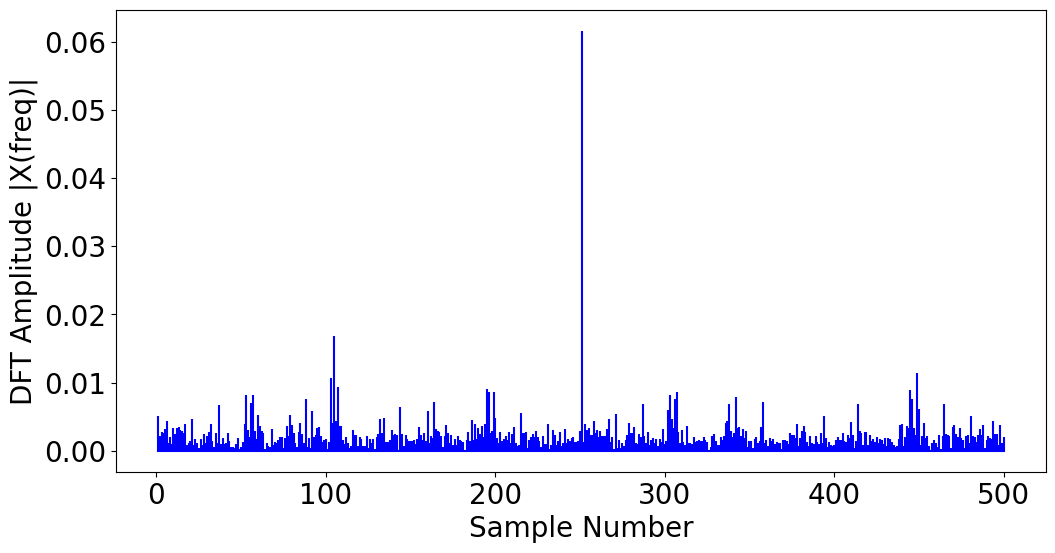

In [31]:

# Assuming n is the number of points on the x-axis
n = len(frequency_domain_data[1])

# Create an array of x-values from 1 to n
x_values = np.arange(1, n + 1)

plt.figure(figsize=(12, 6))
plt.stem(x_values, frequency_domain_data[1], 'b', markerfmt=" ", basefmt="-b")
plt.xlabel('Sample Number', fontsize=20)
plt.ylabel('DFT Amplitude |X(freq)|', fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)

# Show the plot
plt.show()

In [ ]:

# Your existing code to create the plot
f_oneside = freq[:n_oneside] / 1e6  # Convert Hertz to Megahertz

plt.figure(figsize=(12, 6))
plt.stem(f_oneside, frequency_domain_data[1], 'b', markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (MHz)',fontsize=20)
plt.ylabel('DFT Amplitude |X(freq)|',fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.xlim(0,15)
# Show the plot
plt.show()

In [ ]:
plt.stem(frequency_domain_data[3], 'b', markerfmt=" ", basefmt="-b")

In [ ]:
np.shape(frequency_domain_data[1])